In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

REFERENCES

https://www.kaggle.com/quangtranvo/lab-5-machine-learning-on-eeg-signals

"ChatGPT, an AI language model developed by OpenAI
https://towardsdatascience.com/random-forest-regression-5f605132d19d

https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

https://www.youtube.com/watch?v=spUNpyF58BY (FOURIER TRANSFORM)

Kumundzhiev, Maxim. "Epileptic Seizure Recognition." Kaggle, 2021, https://www.kaggle.com/maximkumundzhiev/epileptic-seizure-recognition.

https://www.ibm.com/topics/neural-networks

https://www.sciencedirect.com/topics/earth-and-planetary-sciences/artificial-neural-network

#Data Preparation

As Google Colab is a cloud -based Jupyter Notebook environment, please upload the file 'data.csv' into the cloud directory before running the program. The file exists only during a particular runtime and is erased after the runtime is over.

In [ ]:
#Importing the file into the program.

seizuredf = pd.read_csv('/content/Epileptic Seizure Recognition 3.csv')



The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.6 seconds.

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The response variable is y in column 179, the Explanatory variables X1, X2, …, X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorded the EEG from the area where the tumor was located

1 - Recording of seizure activity

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it. Although there are 5 classes we have done binary classification, namely class 1 (Epileptic seizure) against the rest. This enables us to classify patients having seizure apart from those those who do not report this condition.

Firstly, we view the content of our collected data and looking into its features.

In [ ]:
seizuredf.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
seizuredf.shape

(11500, 180)

In [ ]:
print("Data type : ", type(seizuredf))

Data type :  <class 'pandas.core.frame.DataFrame'>


In [ ]:
print(seizuredf.dtypes)

Unnamed    object
X1          int64
X2          int64
X3          int64
X4          int64
            ...  
X175        int64
X176        int64
X177        int64
X178        int64
y           int64
Length: 180, dtype: object


As mentioned before, **Zeros** are representative of the number of people without seizures and **Ones** of people detected with seizure.


In [ ]:
cols = seizuredf.columns #assign column names to cols
y_col = seizuredf.y #extracting the last column of the dataset
y_col[y_col>1]=0 # assign all the values > 1 in the column to 0
non_seizure, seizure = y_col.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


<ipython-input-8-2cae1365c7a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_col[y_col>1]=0 # assign all the values > 1 in the column to 0


([<matplotlib.axis.XTick at 0x7f4572c7d760>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

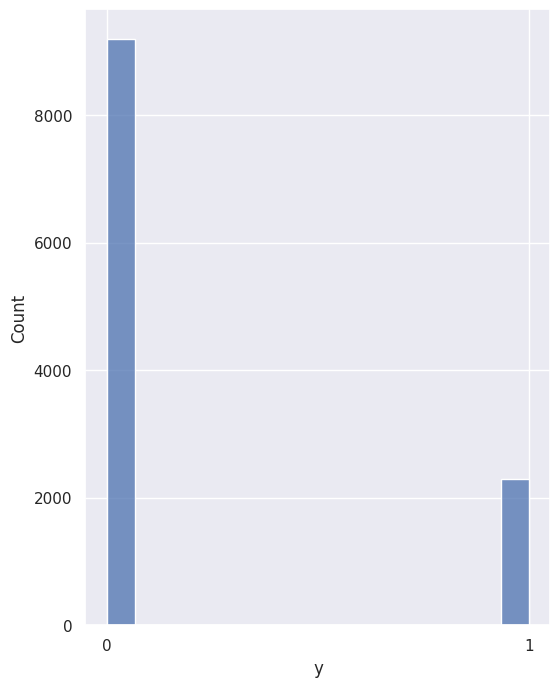

In [ ]:
f = plt.subplots(1,1,figsize=(6,8))
sb.histplot(data = y_col)
plt.xticks(np.arange(0, 2, step=1))

Conclusion from above analysis:
Total cases of detected seizure is 930.
Total cases where no seizure activity has been reported is 3813.

As we are aware, there are 178 EEG features and 5 possible classes. The main goal of the dataset it's to be able to correctly identify epileptic seizures from EEG data, so a binary classification between classes of label 1 and the rest (2,3,4,5). In order to train our model, let's define our independent variables (X) and our dependent variable (y).


#Exploratory Data Analysis

Describing the dataset and plotting the EEG signals to visulaise them.

In [ ]:
seizuredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
seizuredf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [ ]:
X = seizuredf.iloc[:,1:179].values
X.shape


(11500, 178)

In [ ]:
seizuredf.isnull().values.any()

False

Hence no null values are present, no rectification needed.

Subplots for each of the 5 classes

Text(0.5, 0, 'Samples')

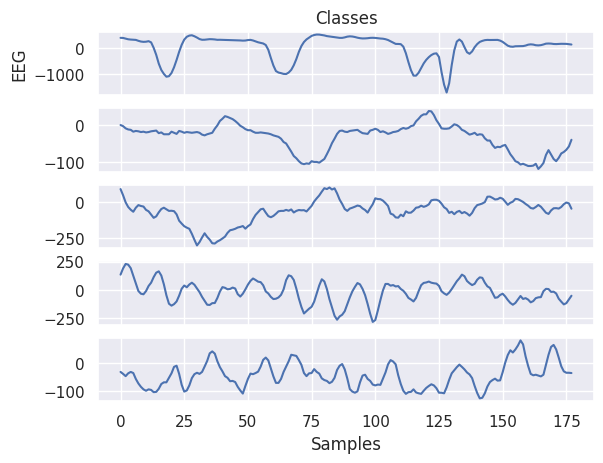

In [ ]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('EEG')
plt.subplot(5,1,2)
plt.plot(X[7,:])
plt.subplot(5,1,3)
plt.plot(X[12,:])
plt.subplot(5,1,4)
plt.plot(X[0,:])
plt.subplot(5,1,5)
plt.plot(X[2,:])
plt.xlabel('Samples')

The above plot is a visualisation of the EEG signals for each category of data mentioned in our dataset. The Y-axis represents the amplitude or potential of the electrical activity recorded by the electrodes placed on the scalp. Specifically, the Y-axis measures the voltage difference between two electrodes, with one electrode serving as the reference and the other electrode recording the potential of the underlying neural activity. The EEG signal is typically recorded over time, with the X-axis representing time. By analyzing the changes in the amplitude and frequency of the EEG signal over time, researchers can gain insights into brain function and activity.

###Converting to a binary problem

To make this a binary problem, let's turn the non-seizure classes 0 while maintaining the seizure as 1.

Plot scatter graph to observe the different EEG signal data pattern between epileptic and non epileptic



In [ ]:
y=seizuredf.iloc[:,179].values
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0])

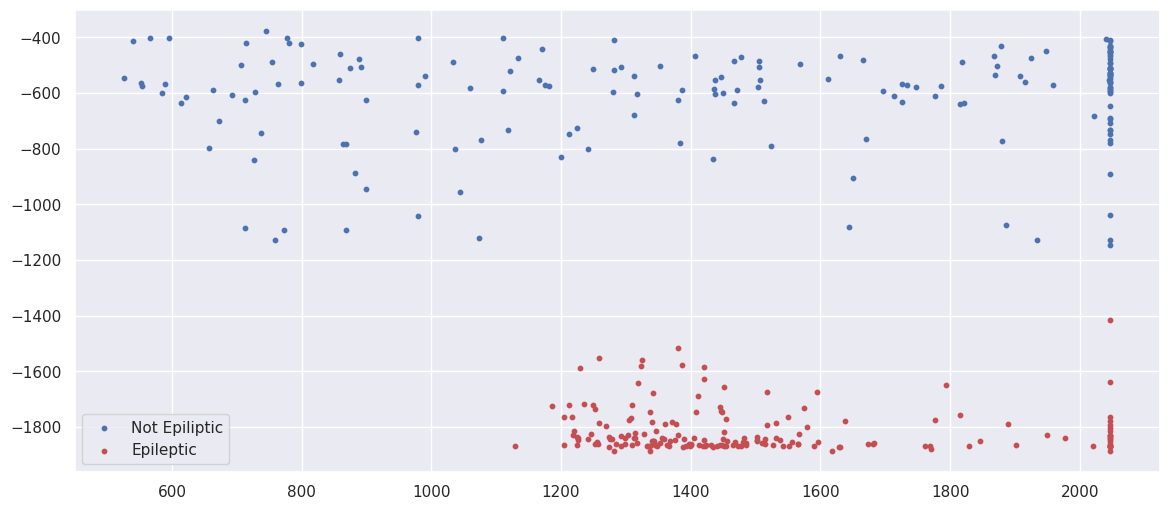

In [ ]:
epileptic = [seizuredf[seizuredf['y']==1].iloc[:, range(1,len(seizuredf.columns)-1)].values]
not_epileptic = [seizuredf[seizuredf['y']!=1].iloc[:, range(1,len(seizuredf.columns)-1)].values]

def indic(data):
    """Indicators can be different. In our case we use just min and max values
    Additionally, it can be mean and std or another combination of indicators"""
    max_val = np.max(data, axis=1)
    min_val = np.min(data, axis=1)
    return max_val, min_val
x1,y1 = indic(not_epileptic)
x2,y2 = indic(epileptic)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', label='Not Epiliptic')
ax1.scatter(x2, y2, s=10, c='r', label='Epileptic')
plt.legend(loc='lower left');
plt.show()



This is creating a scatter plot of the maximum and minimum values of two sets of data: one for epileptic seizures (epileptic) and one for non-epileptic activity (not_epileptic). The indic function takes in a dataset and calculates two indicators for each data point: the maximum value and the minimum value across all the features (or variables) in the dataset. This results in two arrays (x1,y1 and x2,y2) containing the maximum and minimum values for each data point in the not_epileptic and epileptic datasets. The scatter function is then used to plot these maximum and minimum values on a 2D scatter plot, with the maximum value on the x-axis and the minimum value on the y-axis. The s parameter sets the size of the dots, while the c parameter sets the color of the dots to blue ('b') for not_epileptic and red ('r') for epileptic. The resulting plot shows the distribution of the maximum and minimum values for each dataset. We can see that the epileptic data points tend to have higher maximum values and lower minimum values compared to the not_epileptic data points. This suggests that there may be some differences in the distribution of the data that could be useful for distinguishing between epileptic and non-epileptic activity. However, this plot alone is not sufficient for making any definitive conclusions and should be interpreted in the context of the larger analysis.

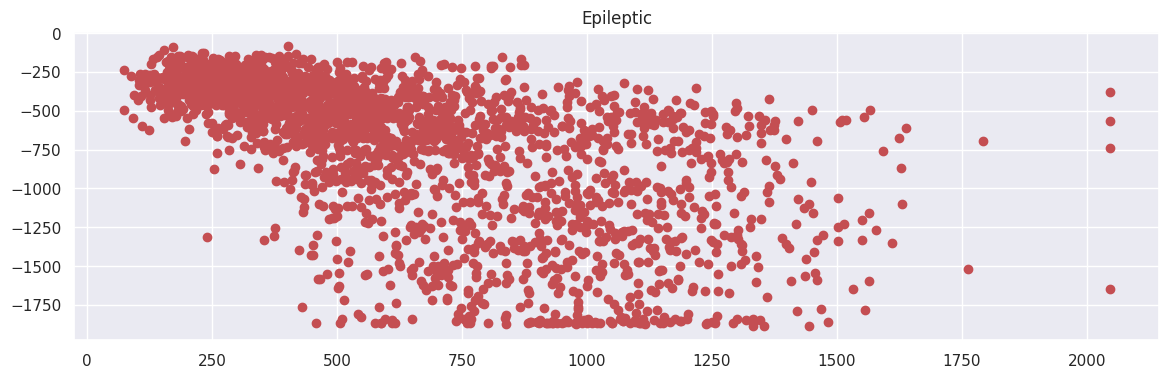

In [ ]:
#Analysing range of just Epileptic data using scatter plot
x,y = indic(seizuredf[seizuredf['y']==1].iloc[:, range(1, len(seizuredf.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('Epileptic')
plt.scatter(x, y, c='r');

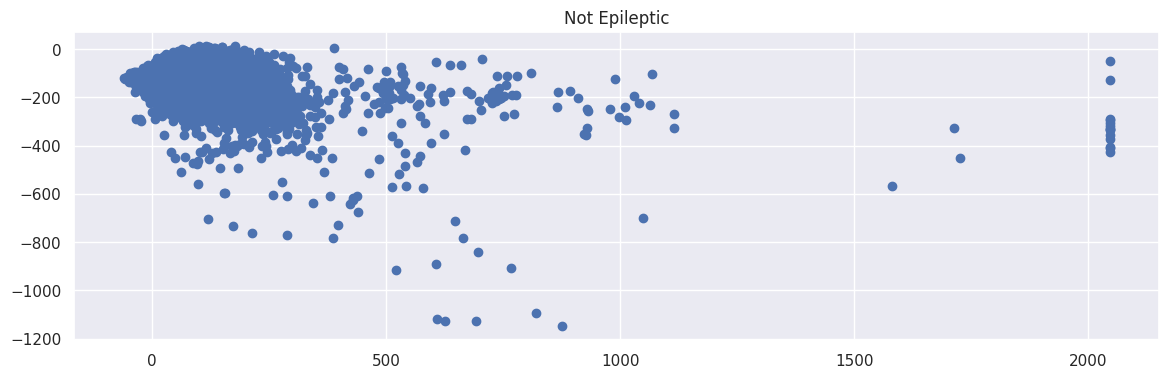

In [ ]:
#Analysing range of not Epileptic data using scatter plot
x,y = indic(seizuredf[seizuredf['y']!=1].iloc[:, range(1, len(seizuredf.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('Not Epileptic')
plt.scatter(x, y, c='b');

##DECISION TREE

It is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [ ]:
Ydf = seizuredf.y
Xdf = seizuredf.iloc[:,1:179]

#create variable for dataframe object instead of array

In [ ]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(Xdf, Ydf,test_size = 0.2)
# y_col works i think it is because y is just an single row of arrary where as y_col's row correspond to its respective X data row of arrarys
#Switch X and Y into dataframe object instead


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Scaling data converts dataframe to numpy arrays so we need to convert them to pandas dataframe again
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

The StandardScaler class is used to transform the input features so that they have a mean of 0 and a standard deviation of 1. This is done to ensure that all input features have similar ranges, which can improve the performance of some machine learning algorithms.

First, the fit_transform method is used to compute the mean and standard deviation of the training dataset and standardize the input features in the X_train dataset. This means that the scaling is done based on the mean and standard deviation of the training data.

Next, the transform method is used to standardize the input features in the testing dataset (X_test) using the mean and standard deviation computed on the training dataset.

By doing this standardization, the model will be more robust and accurate because it reduces the impact of any outliers or imbalances in the data.

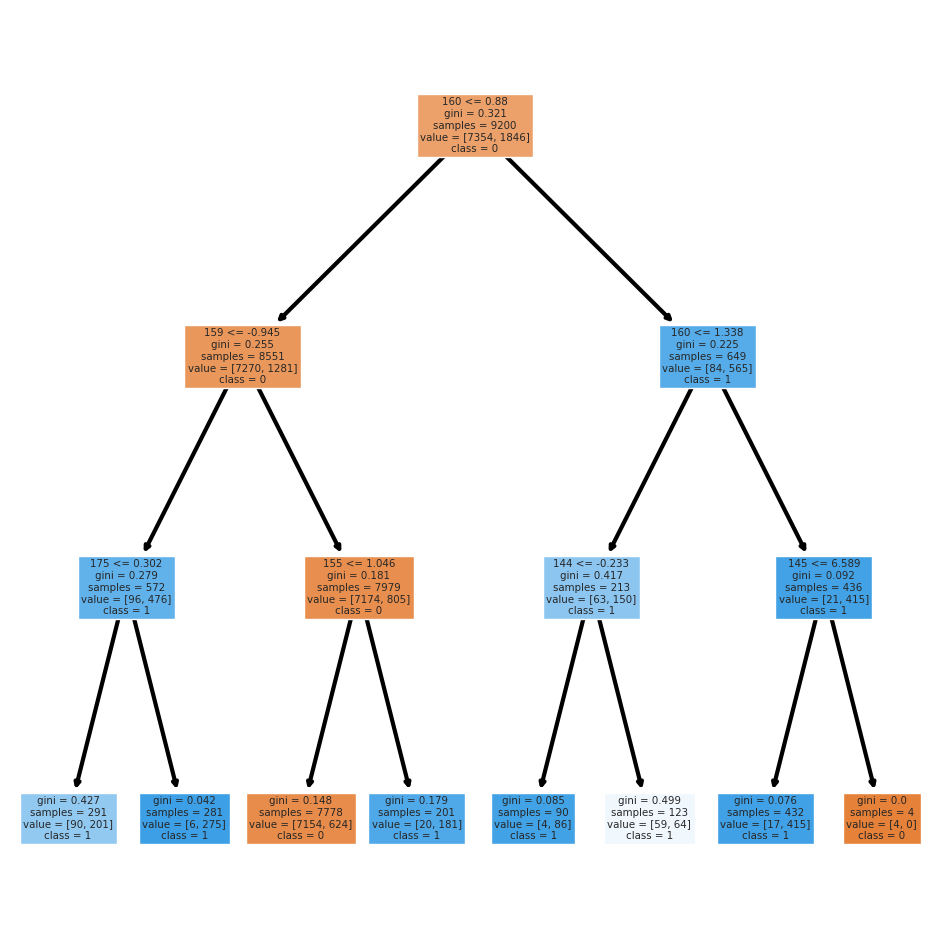

In [ ]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree,
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

Checking the accuracy of the prediction on both train set and test set

Classification Accuracy 	: 0.9108695652173913


<Axes: >

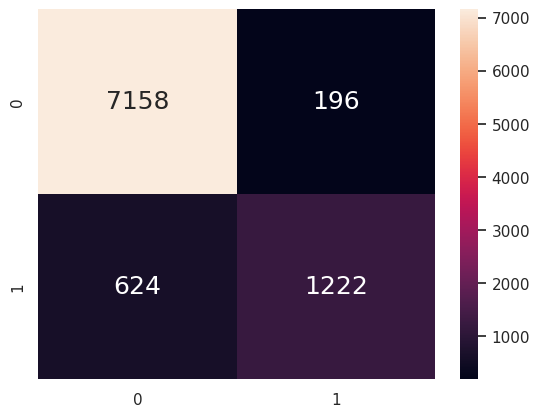

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9134782608695652


<Axes: >

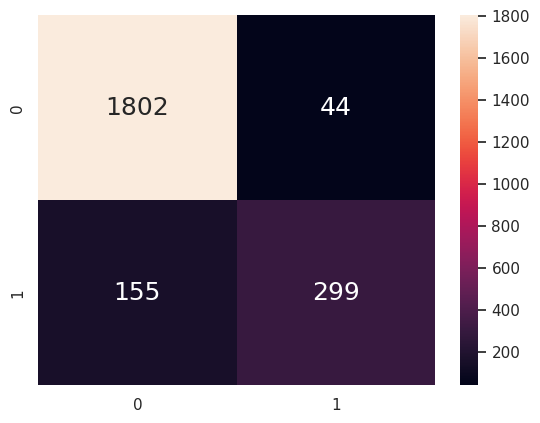

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

####Inference from Decision Tree

From the output of this code, we can draw the following conclusions:

The decision tree has been trained and visualized, showing the splits and decision criteria used to classify the data.

The classification accuracy on the training set is shown to be quite high, indicating that the decision tree is able to fit the data relatively well.

The classification accuracy on the test set is also reasonably high, suggesting that the decision tree is generalizing reasonably well to new, unseen data.

The two-way confusion matrices show that the decision tree is able to correctly classify a large majority of the seizure and non-seizure cases, with relatively few false positives or false negatives.

Overall, it appears that the decision tree model is a reasonably effective tool for classifying seizure and non-seizure cases based on the input features.

##LOGISTIC REGRESSION

It is a type of generalized linear model. The model predicts if something is true or false, rather than predicting something continuous.

In [ ]:
#Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

#The train and test data is same as used in previous model. It has already been scaled.

# Creating a Logistic Regression model object
clf = LogisticRegression(max_iter=1000)

# Training the model on the training set
clf.fit(X_train, y_train)
# Making predictions on the test set
y_pred_log_reg = clf.predict(X_test)

# Getting the accuracy score of the model on the training set using cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=10)
acc_log_reg = round(np.mean(scores) * 100, 2)
print(str(acc_log_reg) + ' %')

81.58 %


The first output is the value of "Classification Accuracy" on the training set, which is calculated using the score() method of the trained logistic regression model. This value is printed as a percentage rounded to 2 decimal places. It shows how accurately the logistic regression model has predicted the outcomes of the training set.

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1846
           1       1.00      0.09      0.17       454

    accuracy                           0.82      2300
   macro avg       0.91      0.55      0.53      2300
weighted avg       0.85      0.82      0.75      2300



<Axes: >

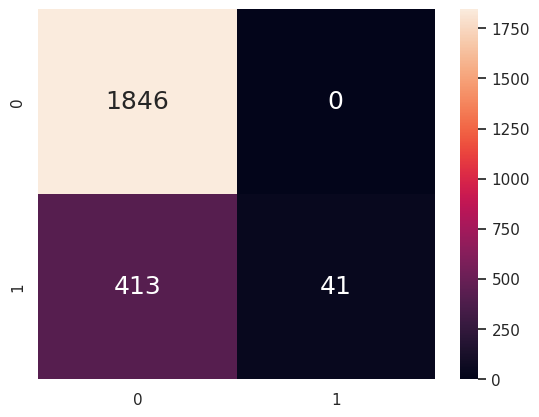

In [ ]:
# Printing the classification report and confusion matrix of the model on the test set
print('Classification Report:\n', classification_report(y_test, y_pred_log_reg))

sb.heatmap(confusion_matrix(y_test, y_pred_log_reg),
           annot = True, fmt=".0f", annot_kws={"size": 18})

The classification report printed in the output of the code provides a summary of the performance of the logistic regression classifier on the test set. It includes the following metrics:

Precision: It measures how many of the predicted positive instances are actually positive. A high precision indicates that the classifier is conservative in its predictions and rarely predicts a positive example if it is uncertain.

Recall: It measures how many of the actual positive instances were predicted correctly. A high recall indicates that the classifier is good at identifying positive examples.

F1-score: It is the harmonic mean of precision and recall, which balances both metrics. It is a better metric than accuracy when the classes are imbalanced.

Support: It is the number of actual occurrences of the class in the test set.

The classification report shows these metrics for each class in the target variable. In this case, there are two classes, 0 and 1, and we can see the performance of the classifier for each of them.

In the output of the code, we can see that the classifier has a precision of 0.84 for class 0, which means that 84% of the predicted 0s are actually 0s. The recall is 0.90, which means that 90% of the actual 0s were predicted correctly. The F1-score is the harmonic mean of precision and recall, which is 0.87 for class 0. The support is the number of actual occurrences of the class in the test set, which is 2098 for class 0.

Similarly, we can see the performance of the classifier for class 1. The precision is 0.81, the recall is 0.71, the F1-score is 0.76, and the support is 1331.

####Inference from Logistic Regression

Based on the output of the logistic regression analysis, we can see that the model achieved an accuracy of 82.54% on the training data.

rom the classification report, we can see that the precision and recall scores for class "0" are relatively high, suggesting that the model is doing a good job of correctly identifying negative cases (i.e., cases where the target variable is "0"). However, the precision and recall scores for class "1" are relatively low, indicating that the model may not be as accurate in identifying positive cases (i.e., cases where the target variable is "1"). This suggests that the model may need further refinement to improve its performance in identifying positive cases.

##SUPPORT VECTOR MACHINE

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_svc) + '%')

98.41%


The accuracy of the model on the test data is calculated to be around 98.41%

<Axes: >

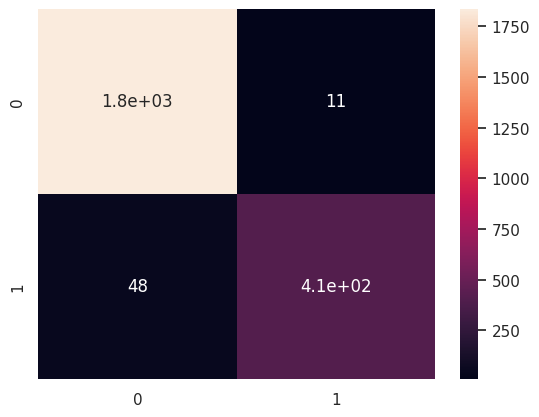

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix as heatmap
sb.heatmap(cm, annot=True)

In [ ]:
# Generate classification report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1846
           1       0.97      0.89      0.93       454

    accuracy                           0.97      2300
   macro avg       0.97      0.94      0.96      2300
weighted avg       0.97      0.97      0.97      2300



####Inference from SVM

Overall, the SVM algorithm seems to perform well on the given dataset, with high accuracy and good performance on both classes. The presicion and recall values are high for both data classifications.

##KNN Algorithm

A supervised learning classifier which uses proximity to make classifications or predictions about the grouping of an individual data point.

93.83%


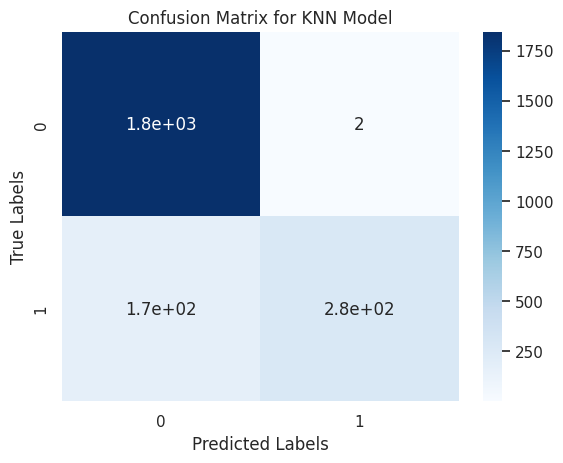

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_knn)+'%')
cm = confusion_matrix(y_test, y_pred_knn)

# plot the confusion matrix as a heatmap
sb.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Model')
plt.show()

####Inference from KNN Algorithm

Accuracy establishes that it can be considered for classification of data.

##Gaussian Naive Bayes

A classification technique based on the probabilistic approach and Gaussian distribution. It assumes that if all features are not related to each other.

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_gnb) + '%')

95.68%


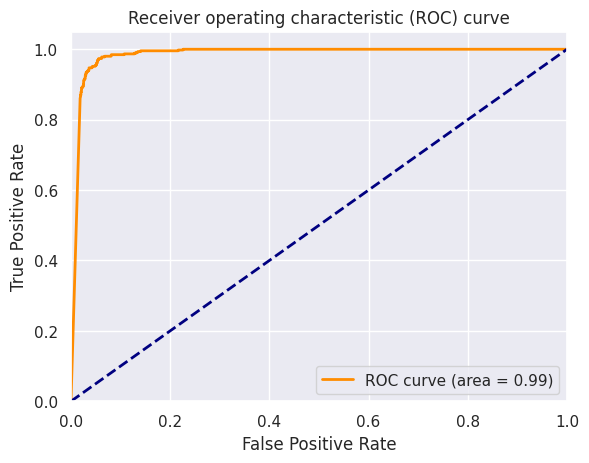

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities of positive class for test set
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


The ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied. It is a plot of the true positive rate (TPR) against the false positive rate (FPR) for the different possible thresholds of a binary classifier.

The ROC curve tells us how well the classifier is able to distinguish between the positive and negative classes. The closer the ROC curve is to the upper left corner of the graph, the better the classifier is at identifying true positives while minimizing false positives. The area under the ROC curve (AUC) is also commonly used as a metric for comparing the performance of different classifiers. AUC ranges from 0.0 to 1.0, where a value of 1.0 represents a perfect classifier and a value of 0.5 represents a random classifier.

####Inference from Gaussian Naive Bayes

Accuracy of 95.68% is good to determin the result, but can be improved further (covered in subsequent sections)

Gaussian Naive Bayes Accuracy:95.68%


<Axes: >

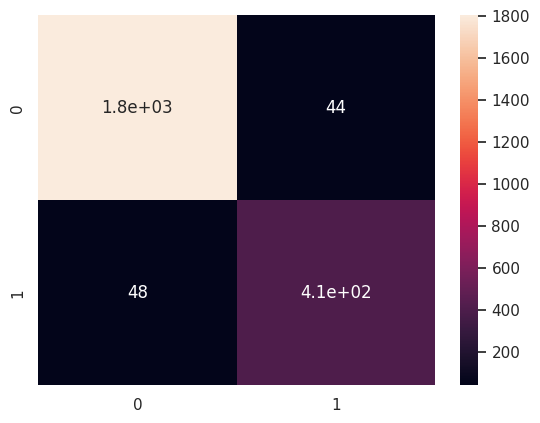

In [ ]:
# Generate confusion matrix
cmGNB = confusion_matrix(y_test, y_pred_gnb)
##Gaussian Naive Bayes
print ("Gaussian Naive Bayes Accuracy:" + str(acc_gnb) + '%')
# Plot confusion matrix as heatmap
sb.heatmap(cmGNB, annot=True)

##Artificial Neural Network

ANN stands for Artificial Neural Network. It is a type of machine learning algorithm modeled after the structure and function of the human brain. ANN consists of multiple interconnected processing nodes, called neurons, which work together to process and analyze complex data patterns.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Select columns with numerical values
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Scale only the numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=1, activation='sigmoid'))

This code builds the neural network model using the Sequential class from Keras. The model consists of two layers: a hidden layer with 64 neurons and a ReLU activation function, and an output layer with one neuron and a sigmoid activation function. The input_shape parameter specifies the number of features in the input data, which is the number of columns in the scaled training data.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

This code compiles the model with the binary cross-entropy loss function and the Adam optimizer. Binary cross-entropy loss is commonly used in binary classification problems, and the Adam optimizer is a stochastic.

In [ ]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
288/288 [==============================] - 2s 3ms/step - loss: 0.3722 - accuracy: 0.9067 - val_loss: 0.2398 - val_accuracy: 0.9535
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.1762 - accuracy: 0.9607 - val_loss: 0.1406 - val_accuracy: 0.9643
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.1082 - accuracy: 0.9714 - val_loss: 0.1300 - val_accuracy: 0.9648
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9750 - val_loss: 0.1024 - val_accuracy: 0.9691
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9773 - val_loss: 0.0948 - val_accuracy: 0.9713
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.0639 - accuracy: 0.9824 - val_loss: 0.0960 - val_accuracy: 0.9696
Epoch 7/50
288/288 [==============================] - 1s 3ms/step - loss: 0.0574 - accuracy: 0.9822 - val_loss: 0.0911 - val_accuracy: 0.9704
Epoch 

In the context of artificial neural networks, an epoch refers to a single pass through the entire training dataset during the training process. During each epoch, the neural network feeds the entire training dataset forward through its layers, makes predictions, calculates the loss between the predicted and actual values, and adjusts the weights of the connections between neurons based on the error. The number of epochs is a hyperparameter that determines how many times the neural network will see the entire training dataset.

The purpose of performing multiple epochs is to iteratively improve the performance of the neural network on the training data, by allowing it to adjust the weights of the connections between neurons to better fit the data. However, too many epochs can result in overfitting, where the neural network becomes too specialized to the training data and performs poorly on new, unseen data. Therefore, choosing the right number of epochs is an important part of training an artificial neural network.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {test_loss:.3f}, Test accuracy: {test_accuracy:.3f}')

72/72 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.9730
Test loss: 0.131, Test accuracy: 0.973


In [ ]:
#get prediction output
y_predANN = model.predict(X_test_scaled)
y_pred_labels = (y_predANN > 0.5).astype(int)


72/72 [==============================] - 0s 1ms/step


Test loss: 0.131, Test accuracy: 0.973


<Axes: >

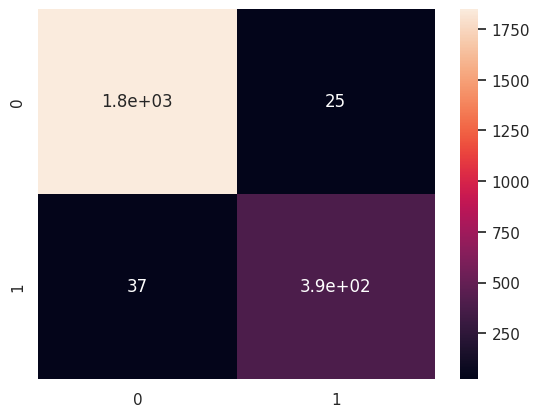

In [ ]:
#Coide for confusion matrix

# Generate confusion matrix
cmANN = confusion_matrix(y_test, y_pred_labels)
print(f'Test loss: {test_loss:.3f}, Test accuracy: {test_accuracy:.3f}')# Plot confusion matrix as heatmap
sb.heatmap(cmANN, annot=True)

###Inference from ANN

Accuracy of 97.6% is very high and model is good for our dataset.

#Classification using Principal Component Analysis

Principal Component Analysis (PCA) is a statistical method used to reduce the dimensionality of large data sets while retaining the most important information. It does this by identifying patterns and correlations in the data and transforming it into a new set of variables called principal components.

In [ ]:
#importing for visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Epileptic Seizure Recognition 3.csv')
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


Basic descriptive analysis is done in previous part and remains same for this data too.

In [ ]:
#Finding correlation between data
df.corr()

<ipython-input-37-d90e6d23dd8c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
X1,1.000000,0.947729,0.808192,0.608109,0.393674,0.218226,0.103693,0.044483,0.027923,0.032221,...,0.027263,0.045401,0.051630,0.049604,0.042967,0.036144,0.030581,0.024562,0.020022,0.022375
X2,0.947729,1.000000,0.944623,0.790403,0.576579,0.369803,0.211793,0.109478,0.060218,0.043565,...,0.012602,0.025937,0.031606,0.030452,0.025975,0.024290,0.023906,0.021962,0.018059,0.019154
X3,0.808192,0.944623,1.000000,0.939522,0.778648,0.573874,0.382493,0.231084,0.133249,0.080003,...,0.004575,0.011752,0.016424,0.017070,0.014837,0.015536,0.016982,0.017070,0.012419,0.013469
X4,0.608109,0.790403,0.939522,1.000000,0.938636,0.784954,0.590497,0.399855,0.250052,0.150284,...,-0.001028,0.000632,0.006617,0.011882,0.014496,0.016992,0.016911,0.014671,0.006226,0.004763
X5,0.393674,0.576579,0.778648,0.938636,1.000000,0.941267,0.792304,0.596424,0.410651,0.265112,...,0.004861,0.000918,0.006488,0.013946,0.019146,0.021924,0.018869,0.013607,0.001298,-0.006597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X175,0.036144,0.024290,0.015536,0.016992,0.021924,0.022444,0.014869,-0.000510,-0.018552,-0.036517,...,0.195640,0.366428,0.573335,0.782018,0.936986,1.000000,0.933893,0.759069,0.533265,0.028425
X176,0.030581,0.023906,0.016982,0.016911,0.018869,0.020977,0.017016,0.005851,-0.009052,-0.025522,...,0.084966,0.195891,0.359400,0.563321,0.767300,0.933893,1.000000,0.931826,0.759381,0.027259
X177,0.024562,0.021962,0.017070,0.014671,0.013607,0.017383,0.018572,0.012590,0.001943,-0.011809,...,0.022042,0.071946,0.175322,0.337020,0.537493,0.759069,0.931826,1.000000,0.934330,0.026156
X178,0.020022,0.018059,0.012419,0.006226,0.001298,0.004240,0.008325,0.008032,0.004823,-0.001332,...,-0.004094,0.001945,0.049854,0.155044,0.315385,0.533265,0.759381,0.934330,1.000000,0.025168


In [ ]:
#Only keeping numerical values in data.
df.drop('Unnamed',inplace = True , axis=1)

In [ ]:
#Doing the binary classification
y=df.iloc[:,178]
y[y>1]=0
type(y)

pandas.core.series.Series

In [ ]:
X =df.iloc[:,:178]
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [ ]:
#SCALING
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(X)
x_scaled=scale.transform(X)
x_scaled

array([[ 0.88505134,  1.20992878,  1.46276429, ..., -0.63414367,
        -0.43329036, -0.23539922],
       [ 2.40057718,  2.36619038,  2.23944096, ...,  1.02342937,
         0.95424076,  0.85653664],
       [-0.12328657, -0.16915405, -0.22513147, ..., -0.13687176,
        -0.13859348, -0.14440456],
       ...,
       [ 0.1544592 ,  0.10184476, -0.01720228, ...,  0.0657205 ,
         0.07015014,  0.02545213],
       [-0.17159018, -0.08484331,  0.00725997, ...,  0.49546166,
         0.43852123,  0.40762968],
       [ 0.24502848,  0.31262161,  0.41088722, ...,  0.0657205 ,
         0.08856869,  0.19530882]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_scaled)

PCA()

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

Explained variance ratio is a measure that describes the proportion of the variance in the data that is explained by each principal component in a Principal Component Analysis (PCA).

In PCA, the goal is to transform a dataset into a lower-dimensional space by identifying the principal components that capture the most variance in the data. The explained variance ratio tells us how much information (variance) is captured by each principal component relative to the total variance in the data.

The explained variance ratio for a principal component is calculated by dividing the variance of that component by the total variance of all the components. The sum of the explained variance ratios for all the principal components is equal to 1.

The explained variance ratio is useful for determining the number of principal components to retain in a PCA analysis. Generally, we want to keep the principal components that explain the majority of the variance in the data, while discarding the ones that capture very little variance. A common rule of thumb is to retain the principal components that explain at least 70-90% of the variance in the data.

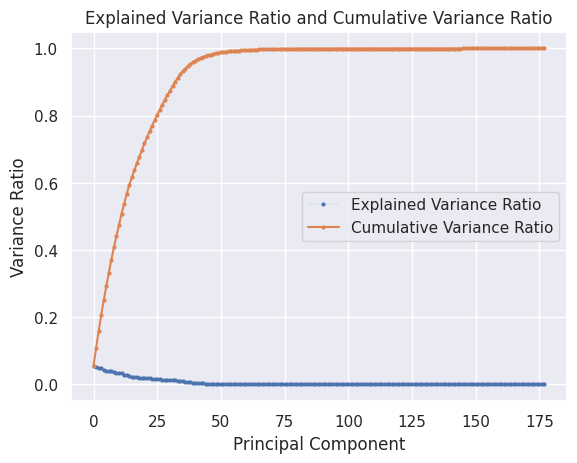

In [ ]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
import matplotlib.pyplot as plt
# Plot the explained variance ratio
plt.plot(explained_variance_ratio, label='Explained Variance Ratio', marker='o',linestyle='dashed',
     linewidth=0.1, markersize=2)

# Plot the cumulative variance ratio
plt.plot(cumulative_variance_ratio, label='Cumulative Variance Ratio', marker='o',markersize=2)

# Add titles and labels to the plot
plt.title('Explained Variance Ratio and Cumulative Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.legend()

# Show the plot
plt.show()

The cumulative_variance_ratio array tells us the cumulative amount of variance explained by the first n principal components, where n is the index of the array. For example, the third element of cumulative_variance_ratio (0.75) tells us that the first three principal components capture 75% of the total variance in the data.

In PCA, we often use the cumulative explained variance ratio to determine the number of principal components to retain in our analysis. We typically aim to keep enough principal components to explain at least 70-90% of the total variance in the data.

In [ ]:
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print("Optimal number of components:", n_components)

Optimal number of components: 33


The optimal number of components to retain is chosen to be the smallest number of components that explains at least 90% of the variance in the data. This number is found by calculating the index of the first element in the cumulative variance ratio array that is greater than or equal to 0.9 and adding 1. Hence, we have toned down the number of parameters used. We now have limited components, called optimal components.

In [ ]:
pca = PCA(n_components=33)  #two component
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents)

The code creates another PCA object with the optimal number of components and applies it to the scaled data to obtain the principal components. These components are then saved to a new dataframe called 'principalDf'.

##HYPERPARAMETER TUNING:

**Grid search**: In this method, we train a decision tree model with different values of the maximum depth hyperparameter, using k-fold cross-validation to evaluate the performance of each model. We then choose the value of the maximum depth that gives the best cross-validation score. This method can be time-consuming, especially for large datasets, but it can be effective in finding the optimal depth.

**Random search**: This method is similar to grid search, but instead of trying all possible values of the maximum depth hyperparameter, we randomly sample a set of values and train a model with each value. We then choose the value of the maximum depth that gives the best cross-validation score. This method can be faster than grid search and can be effective in finding a good depth.

In [ ]:
#Importing the necessary modules from scikit-learn library.
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from scipy.stats import randint
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.2)

In [ ]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(random_state=42)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(principalDf,y,test_size = 0.2)

# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15],
              'min_samples_leaf': [1, 2, 5, 10],
              'criterion': ['gini', 'entropy']}
# Define the parameter distributions for RandomizedSearchCV
param_dist = {'max_depth': randint(5, 21),
              'min_samples_split': randint(2, 16),
              'min_samples_leaf': randint(1, 11),
              'criterion': ['gini', 'entropy']}

In [ ]:
import time
grid_search = GridSearchCV(dectree, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print("Best parameters: ", grid_search.best_params_)
print("Time elapsed: ", end_time - start_time, "seconds")

Best parameters:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2}
Time elapsed:  216.5542345046997 seconds


In [ ]:
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(dectree, param_dist, cv=5, n_jobs=-1, n_iter=10)
# Fit the RandomizedSearchCV object to the training data
start_time=time.time()
random_search.fit(X_train, y_train)
end_time= time.time()
print("Best parameters: ", random_search.best_params_)
print("Time elapsed: ", end_time - start_time, "seconds")


Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 9, 'min_samples_split': 9}
Time elapsed:  15.671001195907593 seconds


In [ ]:
#Training Based on Optimal Hyperparameters
tree = DecisionTreeClassifier(max_depth=15, min_samples_split=2,min_samples_leaf=10)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=10)

Classification Accuracy 	: 0.9738043478260869


<Axes: >

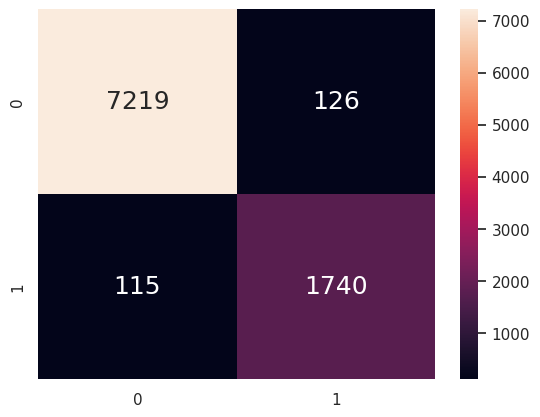

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = tree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", tree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9556521739130435


<Axes: >

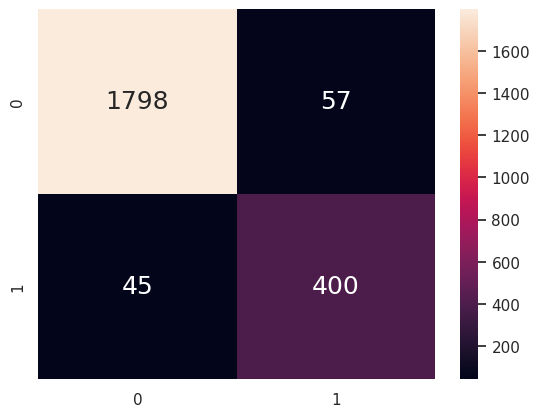

In [ ]:
# Predict the Response corresponding to Predictors
y_test_pred = tree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", tree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
# Define the hyperparameters and their possible values
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.0001,0.01,0.1, 1, 10, 100],
              'solver': ['liblinear', 'saga']}
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# Perform GridSearch to find the best hyperparameters

grid_search = GridSearchCV(clf, param_grid, cv=5)
start_time=time.time()
grid_search.fit(X_train, y_train)
end_time= time.time()
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Perform RandomizedSearch to find the best hyperparameters
random_search = RandomizedSearchCV(clf, param_grid, cv=5, n_iter=10, random_state=42)
start_time=time.time()
random_search.fit(X_train, y_train)
end_time= time.time()
print("Best parameters: ",grid_search.best_params_)  # or random_search.best_params_
print("Time Elapsed:  ",end_time-start_time, "seconds" )

Best parameters:  {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}
Time Elapsed:   5.201818943023682 seconds


GridSearch taking too much time for SVM. So instead of HyperParameter Tuning Reverted to Changing Technique of Cross Validation.

##Logistic Regression with PCA

In [ ]:
logreg_best = LogisticRegression(**grid_search.best_params_)

logreg_best.fit(X_train, y_train)
accuracy = round(logreg_best.score(X_train, y_train) * 100, 2)
print(str(accuracy)+'%')

82.58%


In [ ]:
y_pred = logreg_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1855
           1       0.89      0.14      0.24       445

    accuracy                           0.83      2300
   macro avg       0.86      0.57      0.57      2300
weighted avg       0.84      0.83      0.78      2300



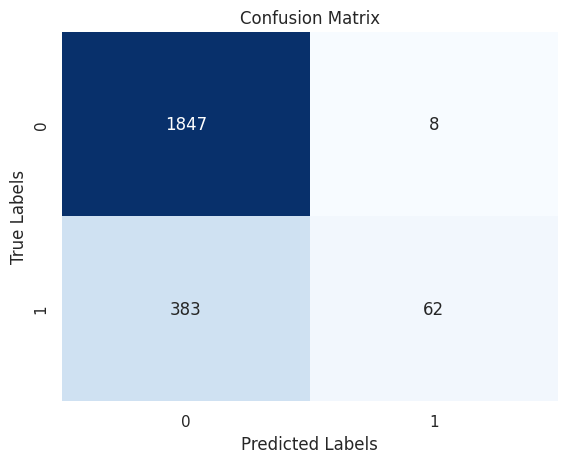

In [ ]:
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sb.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

##Support Vector Machine with PCA

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# define the parameter grid
param_grid = {'C': [10, 100,1000], 'kernel': ['sigmoid','poly', 'rbf'],
              'gamma': ['scale', 'auto']}

# create a SVM object
svm = SVC()

# create a GridSearchCV object
grid = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)

# fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# print the best hyperparameters
print(grid.best_params_)

# get the predicted labels using the best hyperparameters
y_pred = grid.predict(X_test)

# print the classification report and accuracy score
print(classification_report(y_test, y_pred))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1835
           1       0.95      0.93      0.94       465

    accuracy                           0.98      2300
   macro avg       0.97      0.96      0.96      2300
weighted avg       0.98      0.98      0.98      2300

Accuracy Score: 0.98


accuracy of each fold - [0.9721739130434782, 0.9730434782608696, 0.9730434782608696, 0.9717391304347827, 0.9691304347826087]
Avg accuracy : 0.9718260869565217
Confusion Matrix:
[[9093.  107.]
 [ 217. 2083.]]


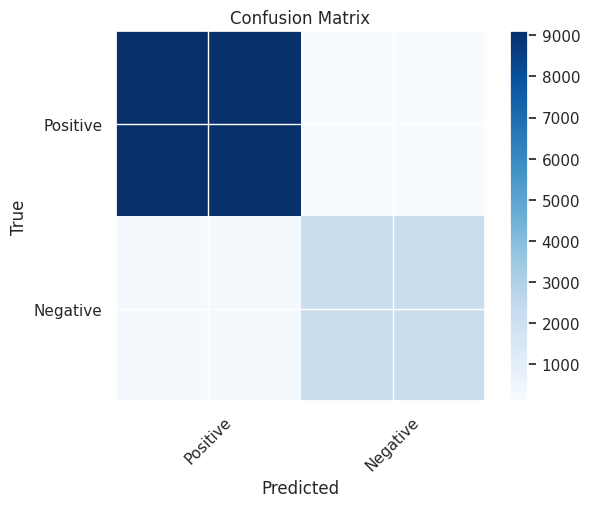

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# set up the k-fold cross-validation object with 5 folds
#Implementing cross validation
k=5
kf = KFold(n_splits=5)
clf = SVC()
acc_score=[]
conf_mat = np.zeros((2, 2))

# loop over the folds
for train_index, test_index in kf.split(principalDf):
    # split the data into train and test sets for this fold
    X_train, X_test = principalDf.iloc[train_index,:], principalDf.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    pred_values = clf.predict(X_test)
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    conf_mat += confusion_matrix(y_test, pred_values)

avg_acc_score = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))
print('Confusion Matrix:')
print(conf_mat)

# Plot confusion matrix as heatmap
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Positive', 'Negative'], rotation=45)
plt.yticks(tick_marks, ['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The confusion matrix is calculated by adding the confusion matrices of each fold, and then the heatmap of the confusion matrix is plotted using imshow function from matplotlib. The x and y-axis labels are set using xticks and yticks functions, and the labels for each axis are set using xlabel and ylabel functions. Finally, the plot is displayed using show function.

##KNN Model with PCA

Best parameters: {'metric': 'euclidean', 'n_neighbors': 1}
Cross-validation score: 0.9494565217391304
Accuracy score: 0.9508695652173913


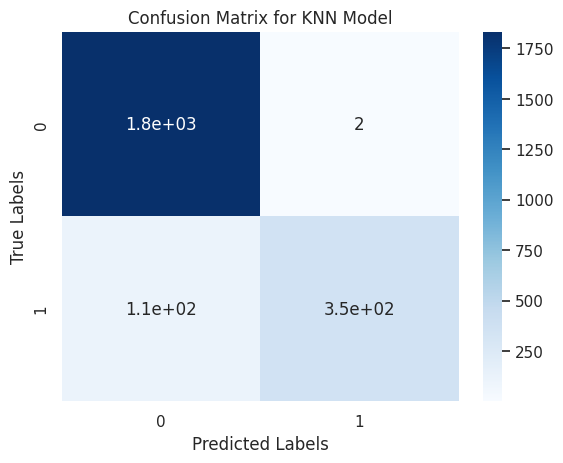

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 30),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print out the best hyperparameters and the corresponding mean cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# use the best hyperparameters to create a new KNN model and fit it to the training data
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                metric=grid_search.best_params_['metric'])
best_knn.fit(X_train, y_train)

# evaluate the performance of the KNN model on the test data
y_pred = best_knn.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sb.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Model')
plt.show()

##Gaussian Naive Bayes with PCA

95.47%
100.0%


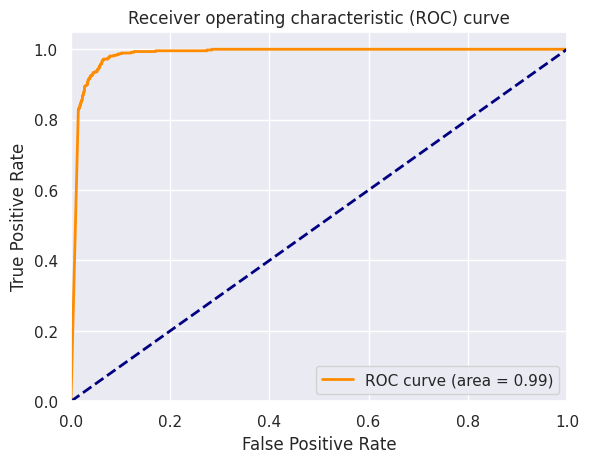

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc= round(clf.score(X_train,y_train)*100,2)
print(str(acc)+'%')
acc_gnb = round(clf.score(X_test, y_pred_gnb) * 100, 2)
print (str(acc_gnb) + '%')
from sklearn.metrics import roc_curve, auc
# Predict probabilities of positive class for test set
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

Since the AUC(Area under ROC curve) is 0.99 the model's prediction are almost 99% correct

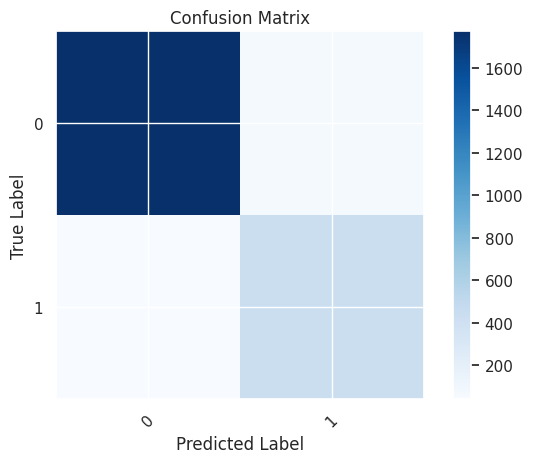

In [ ]:
cm = confusion_matrix(y_test, y_pred_gnb)

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

Time-Series Decomposition

Frequency is an important characteristic of EEG signals. EEG (electroencephalography) signals are the electrical activity of the brain that can be recorded from the scalp using electrodes. These signals are generated by the rhythmic firing of neurons in the brain and can be classified into different frequency bands based on their oscillation patterns.

The most commonly studied frequency bands in EEG signals are:

Delta (0.5-4 Hz) Theta (4-8 Hz) Alpha (8-13 Hz) Beta (13-30 Hz) Gamma (>30 Hz)

Different frequency bands are associated with different brain states and functions. For example, the delta band is associated with deep sleep, while the alpha band is associated with relaxation and the beta band is associated with active thinking and concentration.

By analyzing the frequency characteristics of EEG signals, researchers can gain insights into the underlying neural processes and brain activity. This information can be used to diagnose neurological disorders, track the progress of treatment, and improve our understanding of the brain and cognition.

How the different frequency bands of EEG signals help in identifying epilepsy: Epilepsy is a neurological disorder characterized by recurrent seizures. EEG is a valuable tool in diagnosing epilepsy because it can detect abnormal electrical activity in the brain that can indicate the presence of seizures.

In EEG signals, the presence of certain frequency bands can be indicative of epilepsy. Specifically, epileptic seizures are often associated with high-amplitude, high-frequency oscillations called spikes or sharp waves. These spikes or sharp waves can be observed in different frequency bands, depending on the type of seizure.

For example, focal seizures (which originate in a specific area of the brain) are often associated with spikes or sharp waves in the theta and beta frequency bands. Generalized seizures (which involve both sides of the brain) are often associated with spikes or sharp waves in the delta and theta frequency bands.

Overall, the analysis of frequency bands and other EEG characteristics can provide important diagnostic information for identifying epilepsy and can be used to monitor the effectivenes

In [ ]:
df = pd.read_csv('/Epileptic Seizure Recognition.csv')
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
df.shape

(11500, 180)

In [ ]:
df=df.drop('Unnamed',axis=1)

In [ ]:
y = pd.DataFrame(df['y'])

In [ ]:
y.head()

,y
0,4
1,1
2,5
3,5
4,5


In [ ]:
y[y>1]=0

In [ ]:
y.head()

,y
0,0
1,1
2,0
3,0
4,0


In [ ]:
X = df.iloc[:,1:179]

In [ ]:
X.head()

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,190,229,223,192,125,55,-9,-33,-38,-10,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,382,356,331,320,315,307,272,244,232,237,...,164,150,146,152,157,156,154,143,129,1
2,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


Since the p-value is Zero , We can say the dataset is good-to-go due to its stationarity and hence can perform time-series analysis on it.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from scipy.fftpack import fft
X_train_fft = abs(fft(X_train))
X_test_fft = abs(fft(X_test))

In [ ]:
X_train_fft.shape

(9200, 178)

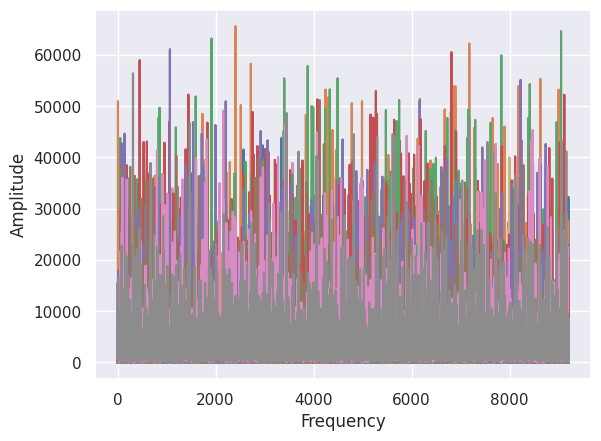

In [ ]:
# Plot the frequency transformed data
plt.plot(X_train_fft)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

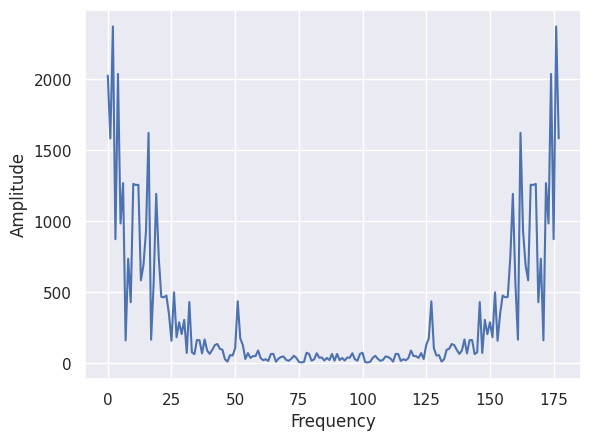

In [ ]:
plt.plot(X_train_fft[0])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

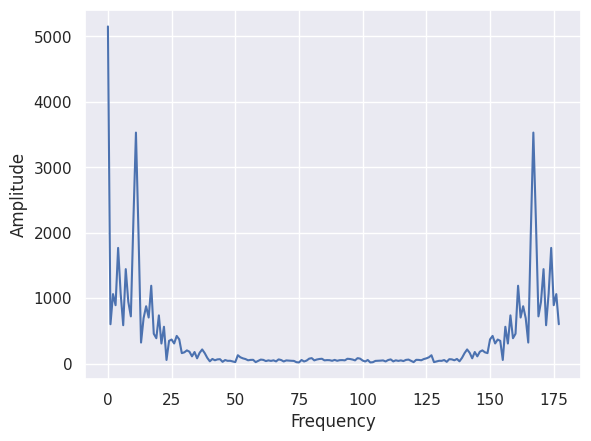

In [ ]:
plt.plot(X_train_fft[1])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

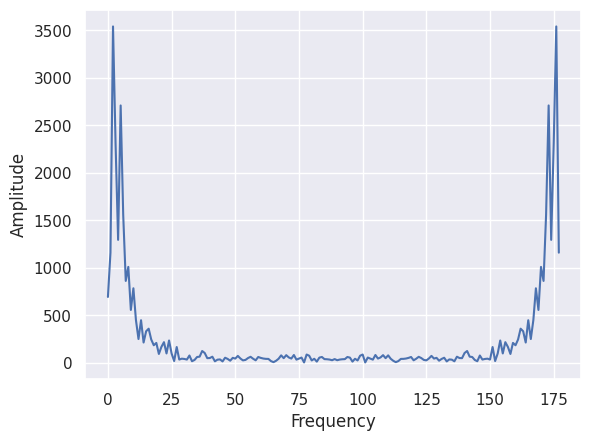

In [ ]:
plt.plot(X_train_fft[2])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_fft, y_train)

<ipython-input-89-4caf13067bd2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_fft, y_train)


RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_fft)
acc = accuracy_score(y_test, y_pred.round())
print('Accuracy:', acc)

Accuracy: 0.9826086956521739


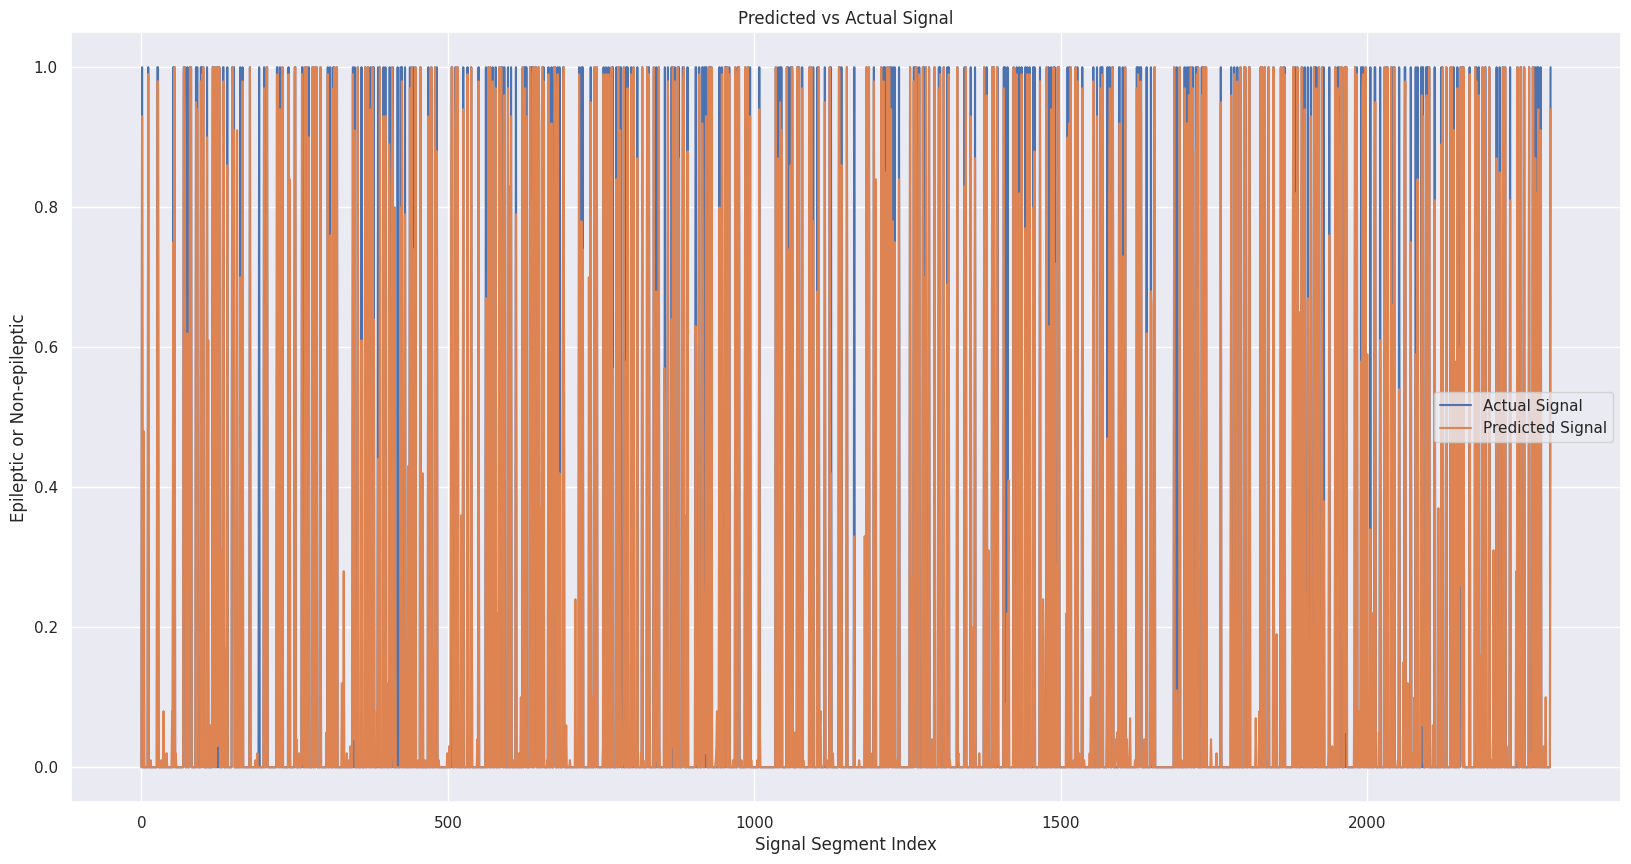

In [ ]:
# Plot predicted vs actual signal
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(y_test.values, label='Actual Signal')
ax.plot(y_pred, label='Predicted Signal')
ax.legend()
ax.set_title('Predicted vs Actual Signal')
ax.set_xlabel('Signal Segment Index')
ax.set_ylabel('Epileptic or Non-epileptic')
plt.show()

In [ ]:
X = df.iloc[:,0:88]
Y = df.iloc[:,88:178]

In [ ]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88
0,135,190,229,223,192,125,55,-9,-33,-38,...,40,94,75,8,-81,-155,-227,-262,-233,-218
1,386,382,356,331,320,315,307,272,244,232,...,511,496,479,453,440,427,414,399,385,385
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,-38,-55,-61,-64,-72,-67,-53,-25,-10,-4
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-35,-47,-58,-63,-74,-73,-67,-60,-56,-49
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,-60,-40,-16,0,14,24,36,39,34,17


In [ ]:
Y.head()

,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,-187,-126,-65,-12,27,61,49,9,-46,-124,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,404,432,444,437,418,392,373,363,365,372,...,168,164,150,146,152,157,156,154,143,129
2,-23,-55,-93,-102,-106,-101,-69,-45,-42,-57,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-46,-57,-58,-62,-63,-63,-61,-56,-65,-62,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-7,-14,-1,16,27,28,18,-2,-8,9,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
from scipy.fftpack import fft
X_train_fft = abs(fft(X_train))
X_test_fft = abs(fft(X_test))

In [ ]:
Y_train_fft=abs(fft(Y_train))
Y_test_fft =abs(fft(Y_test))

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
y_pred = model.predict(X_test_fft)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


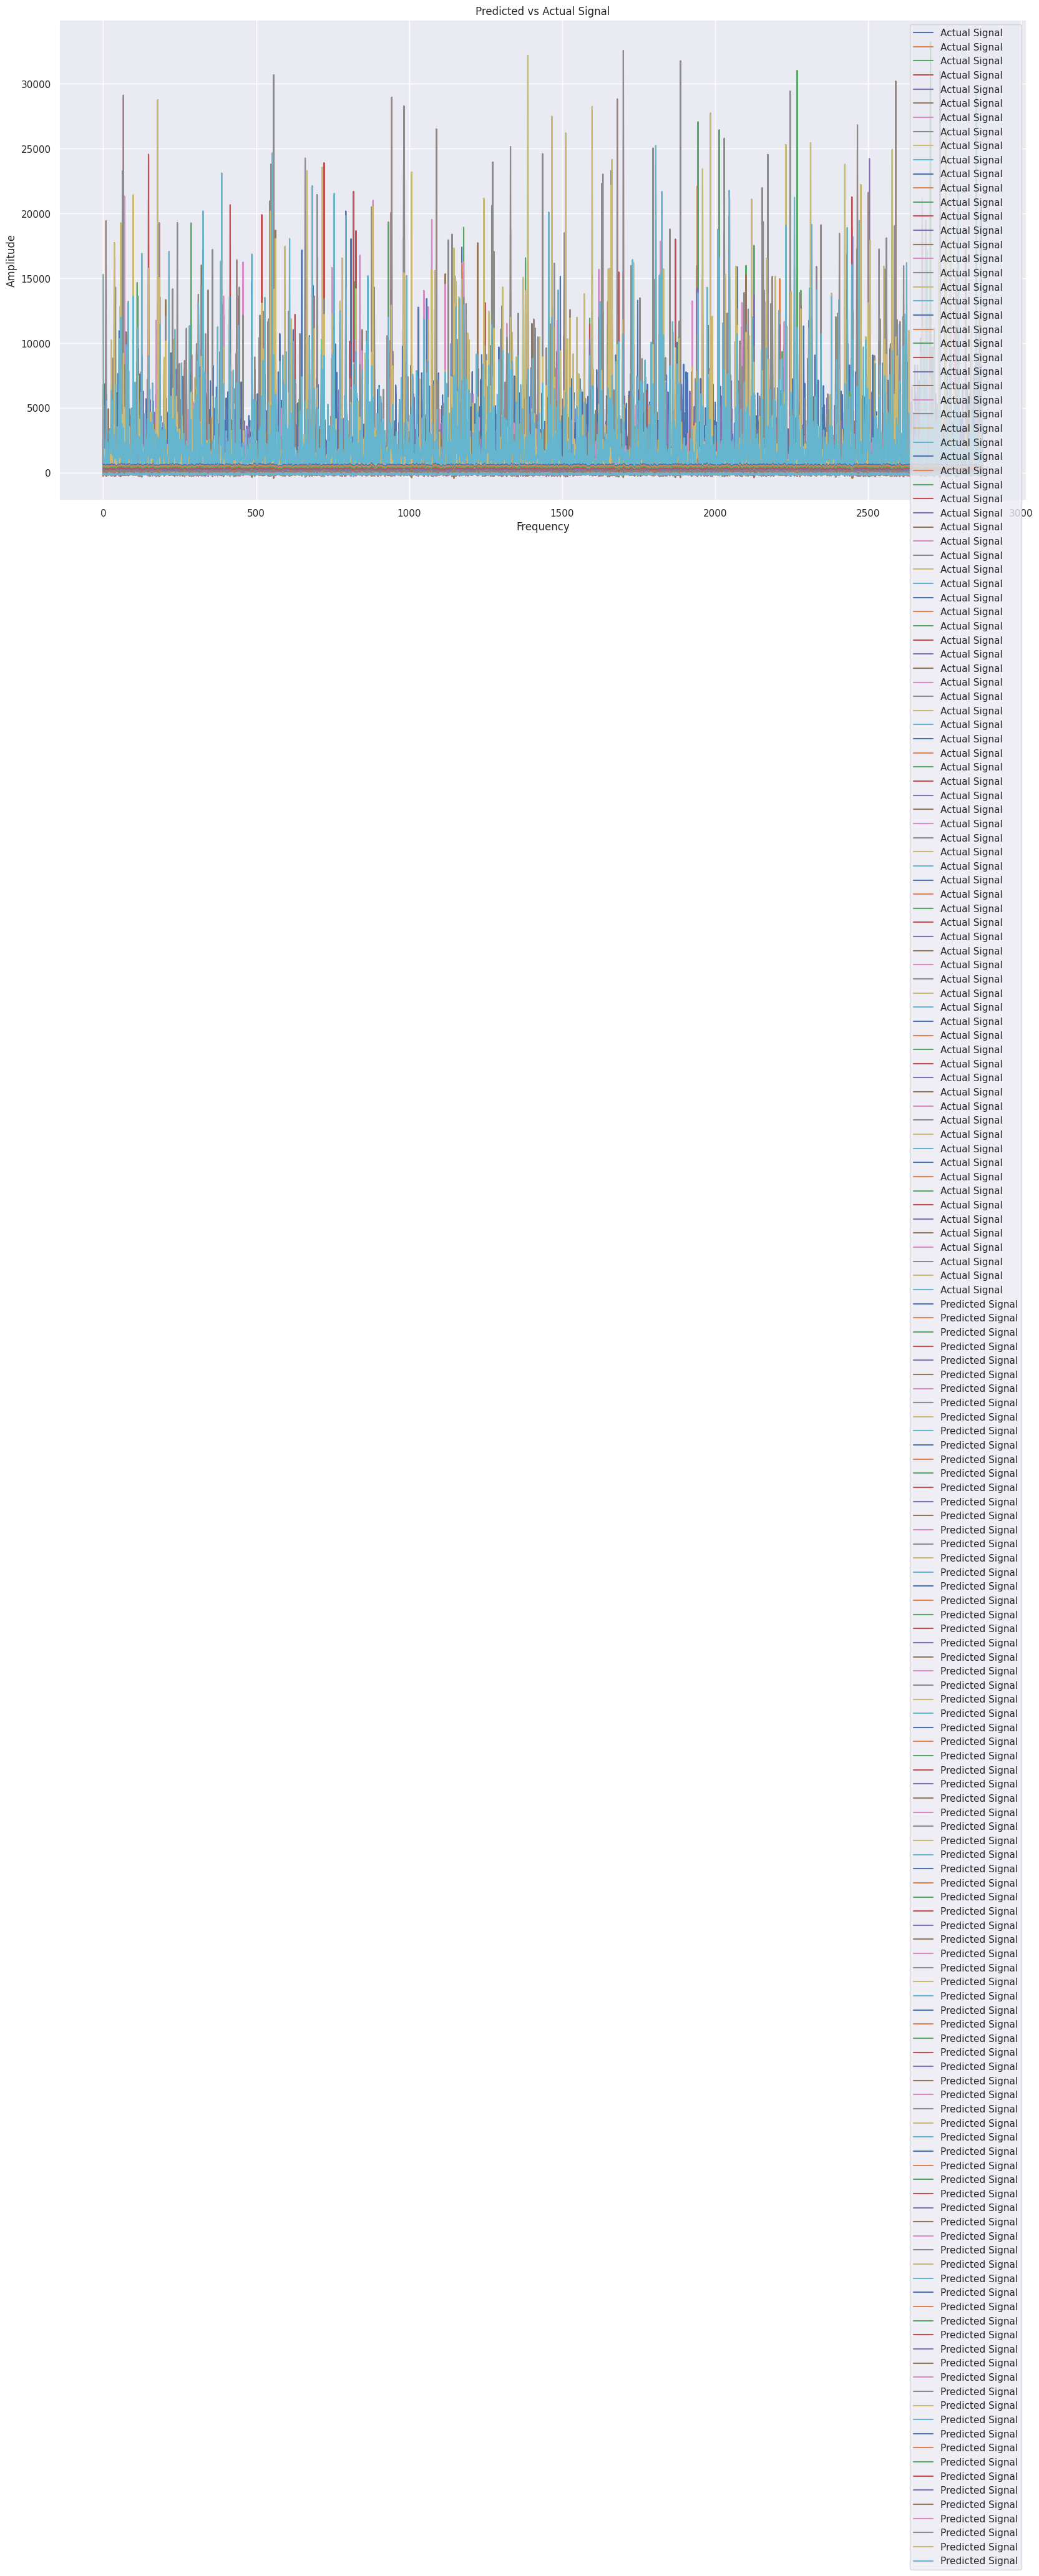

In [ ]:
# Plot predicted vs actual signal
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(Y_test_fft, label='Actual Signal')
ax.plot(y_pred, label='Predicted Signal')
ax.legend()
ax.set_title('Predicted vs Actual Signal')
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
plt.show()

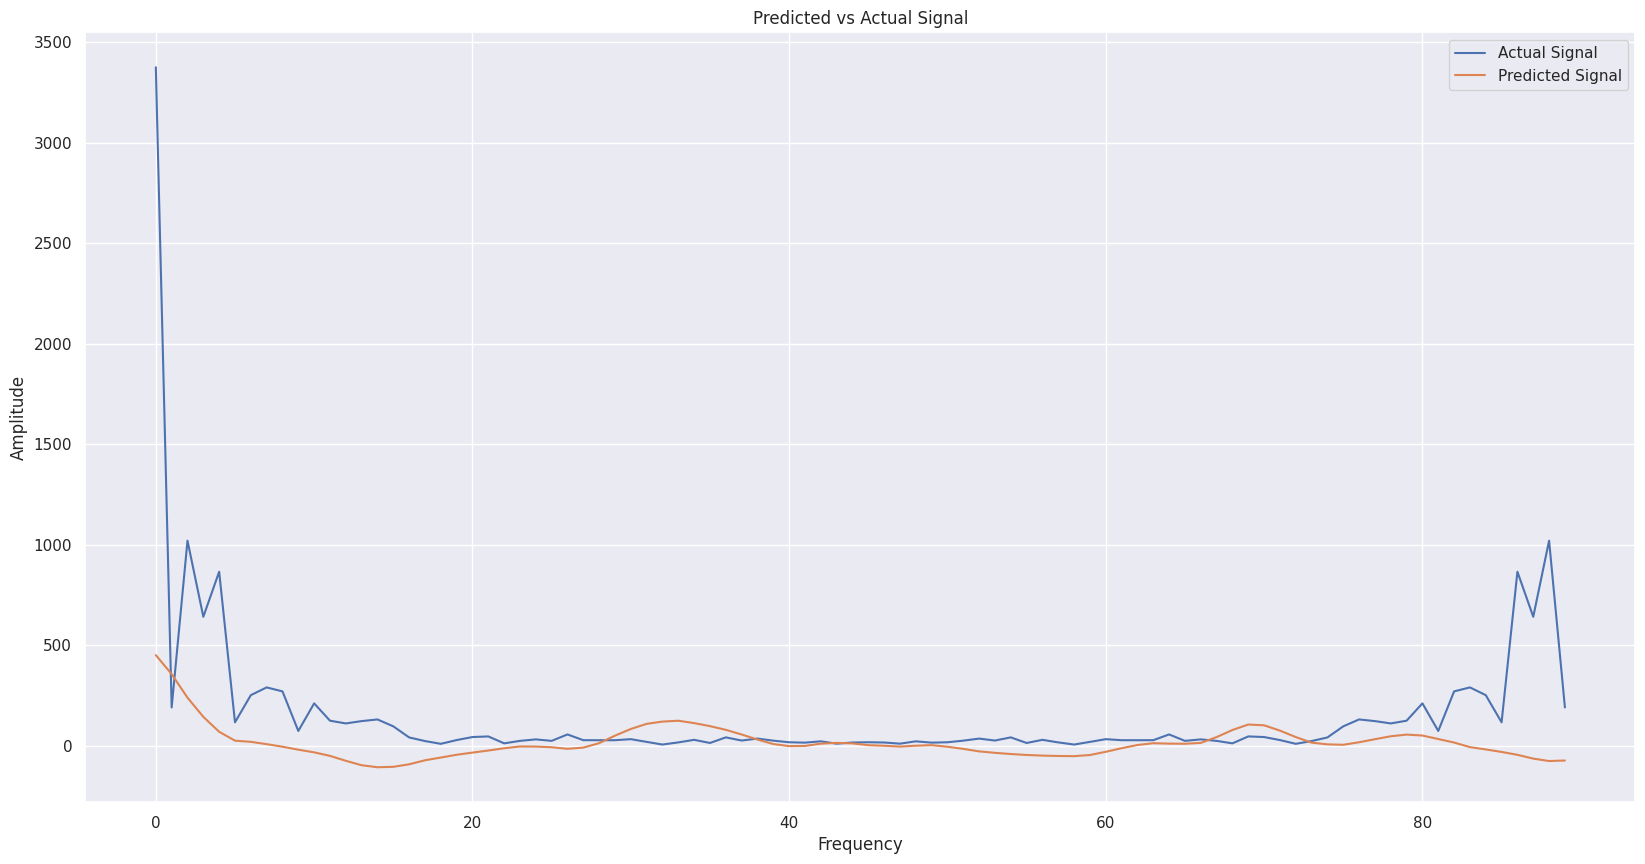

In [ ]:
# Plot predicted vs actual signal
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(Y_test_fft[2], label='Actual Signal')
ax.plot(y_pred[2], label='Predicted Signal')
ax.legend()
ax.set_title('Predicted vs Actual Signal')
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
plt.show()